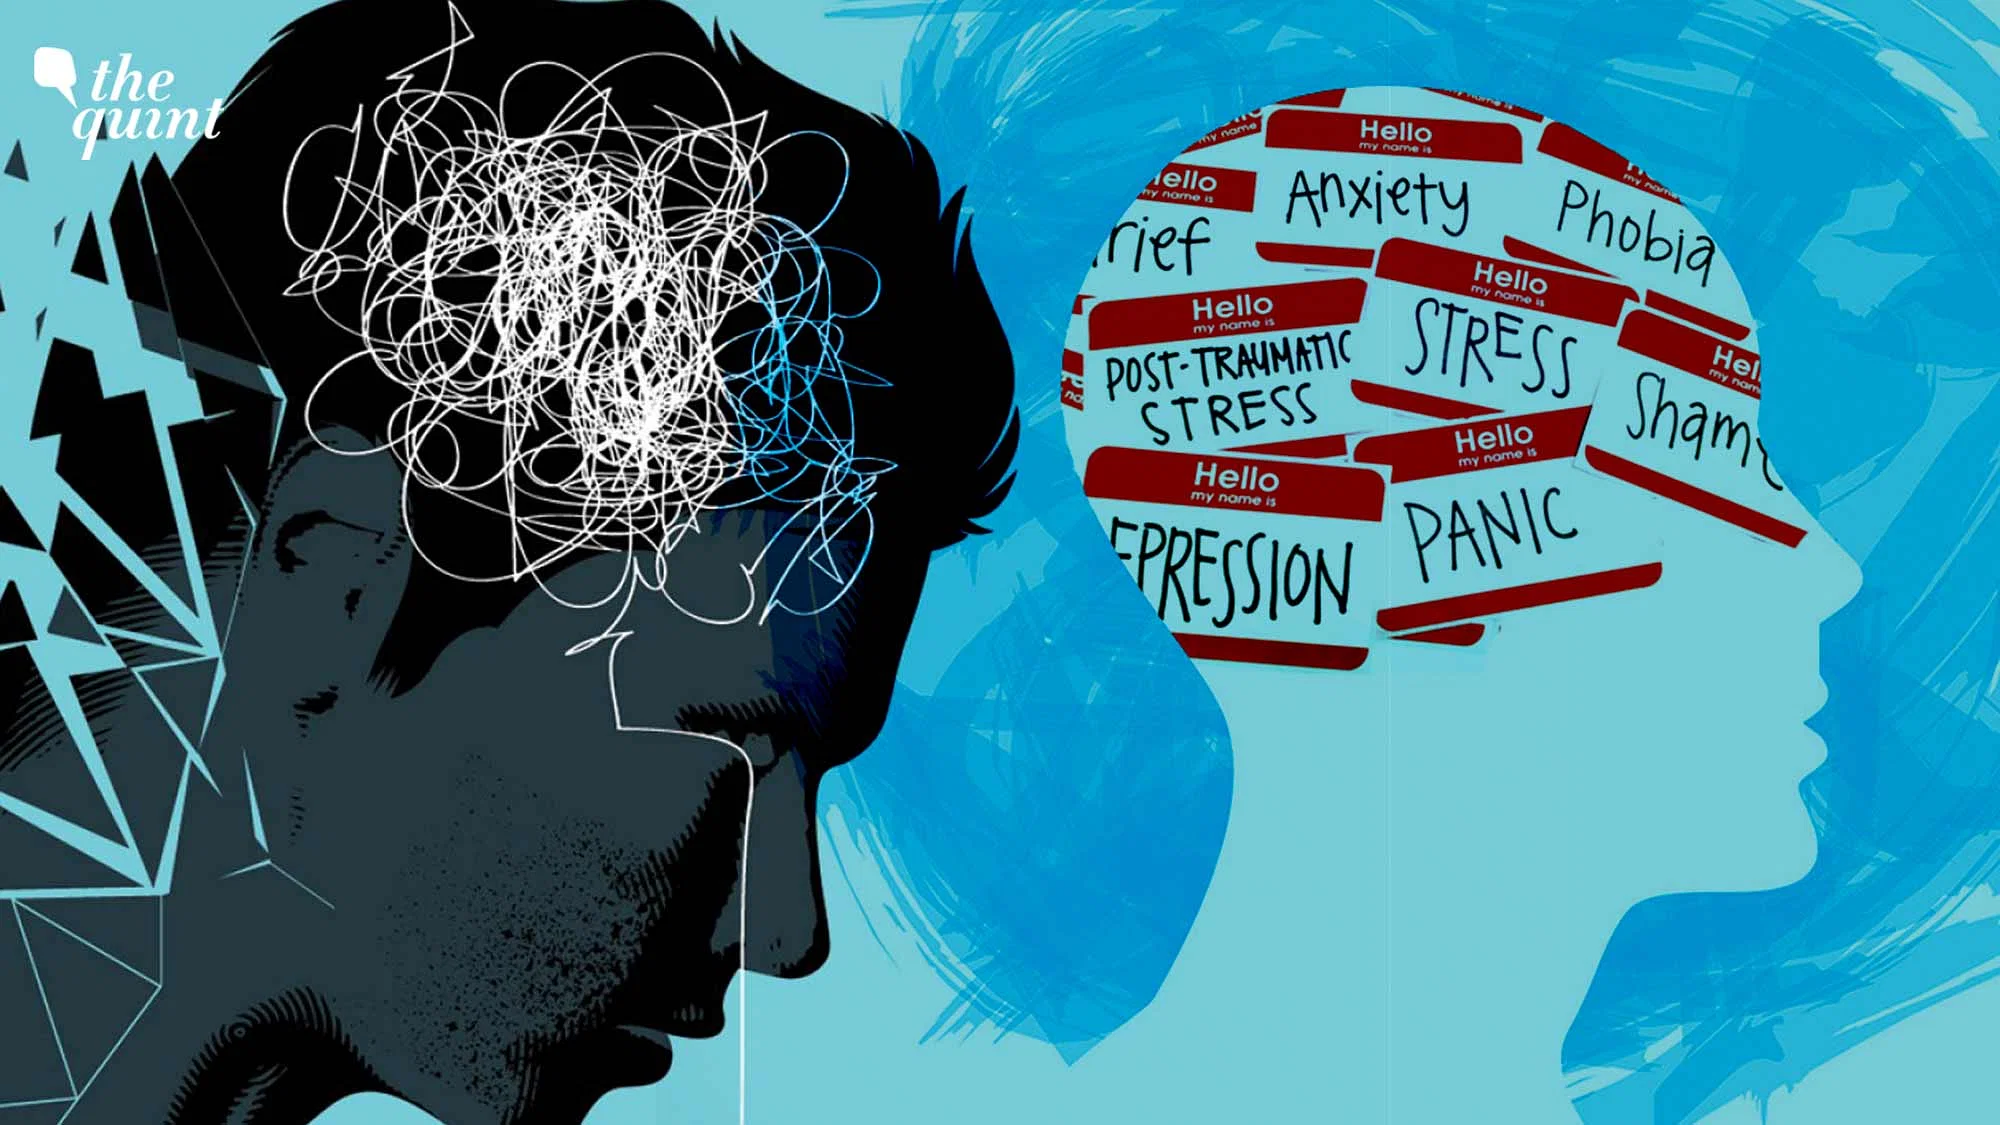

**CAPSTONE PROJECT MENTAL HEALTH ISSUE IDENTIFICATION SYSTEM**

Please fill out:
* Student names: Isaac Wanganga, Cynthia Jerono, Jim Akoko, Bestina Mutisya, Victor Maina, Beryl Wafula
* Student pace:  **PART TIME**
* Scheduled project review date/time: **18/11/2024**
* Instructor name: ****

**1.BUSINESS UNDERSTANDING**

**1.  Introduction**

Mental health has become an urgent public health concern across the globe, and Kenya is no exception. Approximately 25% of outpatients and 40% of inpatients in Kenyan healthcare facilities are affected by mental health conditions, according to the Kenyan National Commission of Human Rights. Depression, substance abuse, stress, and anxiety disorders are among the most commonly diagnosed mental health issues in hospital settings, a reflection of an alarming national trend. The situation is compounded by limited data on mental health, neurological issues, and substance use (MNS) in Kenya, making it challenging to address these concerns effectively.


The World Health Organization (WHO) ranks Kenya among the African nations with the highest depression rates, with estimates suggesting that around two million Kenyans are impacted by depression alone. Disturbingly, one in four Kenyans will experience a mental health disorder at some point in their lives.


Given the urgent need to address mental health concerns, this project aims to leverage artificial intelligence to identify and analyze mental health indicators within social media text.

By capturing and analyzing patterns of mental health issues expressed in public discourse, the project seeks to provide insights that can inform policymakers, healthcare providers, and support systems. In doing so, it contributes to a broader understanding of mental health in Kenya and aligns with the national objective of prioritizing mental well-being.

**Problem Statement**








Mental health issues like depression, anxiety, and suicidal tendencies often go unnoticed in daily conversations, especially in online forums, social media posts, or text-based support systems. Existing tools are either too general or overly reliant on structured input, missing subtle signs of mental distress embedded in unstructured conversations. This project aims to identify potential mental health concerns based on users’ language and conversational patterns in online texts.

**Goals and Objectives**

**1.Identify and Categorize Mental Health Issues:**

Develop a model that can accurately classify different mental health issues (e.g., depression, anxiety, suicidal tendencies) based on text data in Reddit posts and comments.

**2.Analyze Language Patterns Linked to Mental Distress:**

 Detect and analyze linguistic features and conversational patterns commonly associated with mental health issues to help distinguish subtle indicators of distress.

 **3.Assess Sentiment and Emotional Intensity:**
 
  Implement sentiment analysis to assess the emotional intensity and tone of the posts and comments, helping to prioritize urgent cases or severe distress

  **4.Provide Actionable Insights for Intervention:**
  
   Generate insights that could support mental health professionals and social media moderators in identifying and addressing potential cases of mental health crises on forums and social platforms.

**STAKEHOLDERS**

 ### 1.Government and Health Agencies ###

i. **Ministry of Health (Kenya)**: As a primary body responsible for public health policies, they are key stakeholders in using the project's insights to shape mental health policies and interventions.

ii. **Kenyan National Commission on Human Rights**: Involved in advocacy for better mental health services and safeguarding human rights for those affected by mental health issues.

iii. **National Authority for the Campaign Against Alcohol and Drug Abuse (NACADA)**: Given the links between substance abuse and mental health, NACADA's involvement could help tailor intervention programs.

### 2.Healthcare Providers ###

i. **Psychiatrists, Psychologists, and Therapists**: As frontline workers in diagnosing and treating mental health disorders, they would benefit from insights into prevalent issues and potential trends in patient symptoms.

ii. **Healthcare Facilities (Hospitals, Clinics)**: Understanding the mental health landscape can help facilities prepare resources and adapt treatment protocols to better address patient needs.

iii. **Public Health Organizations**: Including organizations like the World Health Organization (WHO), which can leverage findings to inform global and regional strategies on mental health.

 ### 3.Mental Health Advocacy Groups and NGOs ###

i. **Basic Needs Kenya, Mental Health Kenya, and Befrienders Kenya**: These advocacy groups work on awareness, support, and outreach programs, so insights from the project can help them tailor their initiatives and better support affected individuals.

ii. **Kenya Red Cross**: Often involved in providing mental health support during crises, they could use the data to identify areas with higher mental health needs.

### 4.Policy Makers and Legislators ###

i. **National Assembly's Health Committee**: To help in reviewing and proposing mental health legislation that aligns with the insights gathered from the analysis.

ii. **County Health Administrators**: Local level officials who can use insights for tailored mental health programs at the community level.


**2.1 DATA UNDERSTANDING**

**2.DATA COLLECTION**

To gather a robust dataset for the Mindcheck project, we utilized the Reddit API through the Python Reddit API Wrapper (PRAW). This approach enabled us to collect a wide range of posts and comments relevant to mental health discussions, positive expressions, and neutral content, which would support the accurate identification and classification of mental health concerns.

we used keyword-based search queries and collected up to 5,000 posts per subreddit. Each post’s title, body, comments, and metadata (e.g., author information, comment scores, timestamps, and subreddit details) were captured to support downstream text analysis. We also included additional post attributes, such as flair, upvote ratios, and crosspost counts, which may serve as helpful features in identifying mental health patterns.

The final dataset was structured and saved as a CSV file for convenient access, providing a comprehensive sample of mental health, positive, and neutral content from Reddit. 

The data structure supports a comprehensive analysis of mental health discussions on social media, allowing for insights into engagement, sentiment, and topic categorization.

**DATA LOADING AND IMPORTING RELEVANT LIBRARIES**

In [1]:
# IMPORTING RELEVANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score



In [2]:
#LOADING THE DATASET

data = pd.read_csv("broad_reddit_search_with_labels.csv")

In [3]:
#VIEW FIRST FIVE ROWS
data.head()

,title,post_body,comment_body,comment_score,post_url,created,subreddit,label,post_score,post_num_comments,...,author_premium,distinguished,all_awardings,num_crossposts,total_awards_received,post_thumbnail,link_flair_text,post_id,comment_id,author_flair_text
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,2,https://www.reddit.com/r/mentalhealth/comments...,1.730484e+09,mentalhealth,mental_health_issue,1,1,...,False,NaN,[],0,0,self,Venting,1ghb2bs,luw5fgj,NaN
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",2,https://www.reddit.com/r/mentalhealth/comments...,1.730480e+09,mentalhealth,mental_health_issue,1,1,...,False,NaN,[],0,0,self,Venting,1gh9prb,luvspbv,NaN
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",1,https://www.reddit.com/r/mentalhealth/comments...,1.730486e+09,mentalhealth,mental_health_issue,2,2,...,False,NaN,[],0,0,self,Venting,1gh98yg,luwcwu7,NaN
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,2,https://www.reddit.com/r/mentalhealth/comments...,1.730487e+09,mentalhealth,mental_health_issue,2,2,...,False,NaN,[],0,0,self,Venting,1gh98yg,luwep2n,NaN
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,1,https://www.reddit.com/r/mentalhealth/comments...,1.730477e+09,mentalhealth,mental_health_issue,1,4,...,False,NaN,[],0,0,self,Need Support,1gh8q6w,luvir86,NaN


**2.2 DATA DESCRIPTION**

In [4]:
#GETTING GENERAL INFORMATION ON NON-NULL COUNTS AND DATA TYPES FOR PER COLUMN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92395 entries, 0 to 92394
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  92395 non-null  object 
 1   post_body              63730 non-null  object 
 2   comment_body           92395 non-null  object 
 3   comment_score          92395 non-null  int64  
 4   post_url               92395 non-null  object 
 5   created                92395 non-null  float64
 6   subreddit              92395 non-null  object 
 7   label                  92395 non-null  object 
 8   post_score             92395 non-null  int64  
 9   post_num_comments      92395 non-null  int64  
 10  author                 92395 non-null  object 
 11  comment_author         92395 non-null  object 
 12  post_created           92395 non-null  float64
 13  post_flair             35211 non-null  object 
 14  upvote_ratio           92395 non-null  float64
 15  ov

**Description of the data:**

Total Entries: 92,395

Columns: 27, with various data types including object (text), int64 (integer), float64 (floating-point), and bool (boolean).


**Data Columns Overview**

**1.Post and Comment Content:**

**title:**
 The title of the post, which may provide a summary of the content.
**post_body**
 The main content or body of the post.

**comment_body:** 
The content of a specific comment on the post.

**2.Engagement and Score:**

**post_score:** 
The score or upvotes received by the post, which may indicate popularity.
**comment_score:**
The score or upvotes received by the comment.
**upvote_ratio:**
The ratio of upvotes to total votes for the post.
**number of_crossposts:**
The number of times this post has been cross-posted to other subreddits.
**post_num_comments:** 
The number of comments on the post, indicating engagement.

**3.Metadata:**

**post_url:** The URL of the post, useful for tracking or referencing.
**created:** The timestamp when the post or comment was created.
**subreddit:** The subreddit where the post or comment was made, which helps in filtering data by community focus.
**label:** This could represent a manual or model-assigned label (e.g., sentiment, topic, or mental health category).

**4.User Information:**
**author:** The username of the post’s author.
**comment_author:** The username of the comment’s author.
**author_premium:** Indicates if the author has a premium account.
**distinguished:** A flag indicating if the post is from a moderator or other special status.


**5.Post and Comment Attributes:**

**over_18:** A flag indicating if the content is marked as NSFW (Not Safe For Work).
is_self_post: Indicates if the post is a self-post (text-only) rather than a link.
**post_flair and link_flair_text:** Text tags applied to the post, which may reflect topic categories or sentiments.
**author_flair_text:** A flair assigned to the author, possibly indicating affiliation or status in the subreddit.

**6.Awards and Other Engagement Indicators:**

**all_awardings and total_awards_received** Data on awards given to the post or comment, reflecting user appreciation.
**post_thumbnail:** A thumbnail image associated with the post, if available.

**7.Identifiers:**
post_id and comment_id: Unique identifiers for each post and comment, respectively. These help in tracking specific posts or comments.


In [5]:
#CHECK NUMBER OF ROWS AND COLUMNS
data.shape

(92395, 27)

The data set has 92395 rowns and 27 columns

**DROPPING IRRELEVANT COLUMNS**

Based on our project goal of identifying and understanding mental health discussions in social media text:We gruoped the columns into Relevant and Irrelevant columns:

**Relevant Columns(14)**

**Text Content:** title, post_body, comment_body - Primary text fields for analyzing mental health topics and sentiment.

**Engagement Metrics:** post_score, comment_score, upvote_ratio - Indicate community engagement and post relevance.

**Categorization:** label, subreddit, post_flair, link_flair_text - Useful for identifying mental health categories, topics, or sentiment.

**Timestamp:** created - Helps in analyzing trends over time.

**over_18**:May help us analyze age group of people posting about  mental health issues

**total_awards_received**- This column will enable us gaude popularity posts indicating mental health issues on the platform


**Less Relevant Columns(13)**

**Identifiers and URLs:** post_url, post_id, comment_id, author, comment_author - Useful for tracking but not for text analysis.

**Other Metadata:**  author premium,distinguished, post_thumbnail,is_self_post, author_flair_text, num_cross posts - Provide limited insight into mental health content.

**all_awardings**-This may provide similar insights to total awairds receied column so we drop it

In [6]:
#Dropping Columns
# List of columns to drop  based on our analysis
columns_to_drop = [
    'post_url', 'post_id', 'comment_id', 'author', 'comment_author',
    'author_premium', 'distinguished','is_self_post',
    'post_thumbnail', 'all_awardings',
    'author_flair_text', 'num_crossposts', 'all_awardings'
]

# Dropping irrelevant columns from the DataFrame
data = data.drop(columns=columns_to_drop)

# Display the DataFrame to verify
data.head()


,title,post_body,comment_body,comment_score,created,subreddit,label,post_score,post_num_comments,post_created,post_flair,upvote_ratio,over_18,total_awards_received,link_flair_text
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,2,1.730484e+09,mentalhealth,mental_health_issue,1,1,1.730482e+09,Venting,1.0,False,0,Venting
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",2,1.730480e+09,mentalhealth,mental_health_issue,1,1,1.730479e+09,Venting,1.0,False,0,Venting
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",1,1.730486e+09,mentalhealth,mental_health_issue,2,2,1.730478e+09,Venting,1.0,False,0,Venting
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,2,1.730487e+09,mentalhealth,mental_health_issue,2,2,1.730478e+09,Venting,1.0,False,0,Venting
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,1,1.730477e+09,mentalhealth,mental_health_issue,1,4,1.730477e+09,Need Support,1.0,False,0,Need Support


**2.3 DATA CLEANING**

In [7]:
#CHECKING FOR MISSING VALUES
missing_values = data.isnull().sum()
missing_values

title                        0
post_body                28665
comment_body                 0
comment_score                0
created                      0
subreddit                    0
label                        0
post_score                   0
post_num_comments            0
post_created                 0
post_flair               57184
upvote_ratio                 0
over_18                      0
total_awards_received        0
link_flair_text          57184
dtype: int64

In [8]:
# Fill missing values in 'post_body' with an empty string because it's a text field, 
# and missing text can be assumed to have no content.
data['post_body'] = data['post_body'].fillna('')

# Fill missing values in 'post_flair' and 'link_flair_text' with 'No Flair' 
# or 'Unknown' since flairs are categorical and a missing value here likely means 
# that the post didn't have any flair assigned.
data['post_flair'] = data['post_flair'].fillna('No Flair')
data['link_flair_text'] = data['link_flair_text'].fillna('No Flair')

# Display the result to verify the filling of missing values
data.isnull().sum()


title                    0
post_body                0
comment_body             0
comment_score            0
created                  0
subreddit                0
label                    0
post_score               0
post_num_comments        0
post_created             0
post_flair               0
upvote_ratio             0
over_18                  0
total_awards_received    0
link_flair_text          0
dtype: int64

In [9]:
#CHECK FOR DUPLICATES

duplicates = data.duplicated()
duplicate_count = duplicates.sum()
duplicate_count

10

In [10]:
# Remove duplicate rows based on all columns
data = data.drop_duplicates()

# Reset the index after dropping duplicates
data = data.reset_index(drop=True)

# Display the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(data)}")


Number of rows after removing duplicates: 92385


**DEALING WITH OUTLIERS**

We decided to plot histograms and box plots to understand the distribution of the data so that we can choose effective method to deal with outliers.

c:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


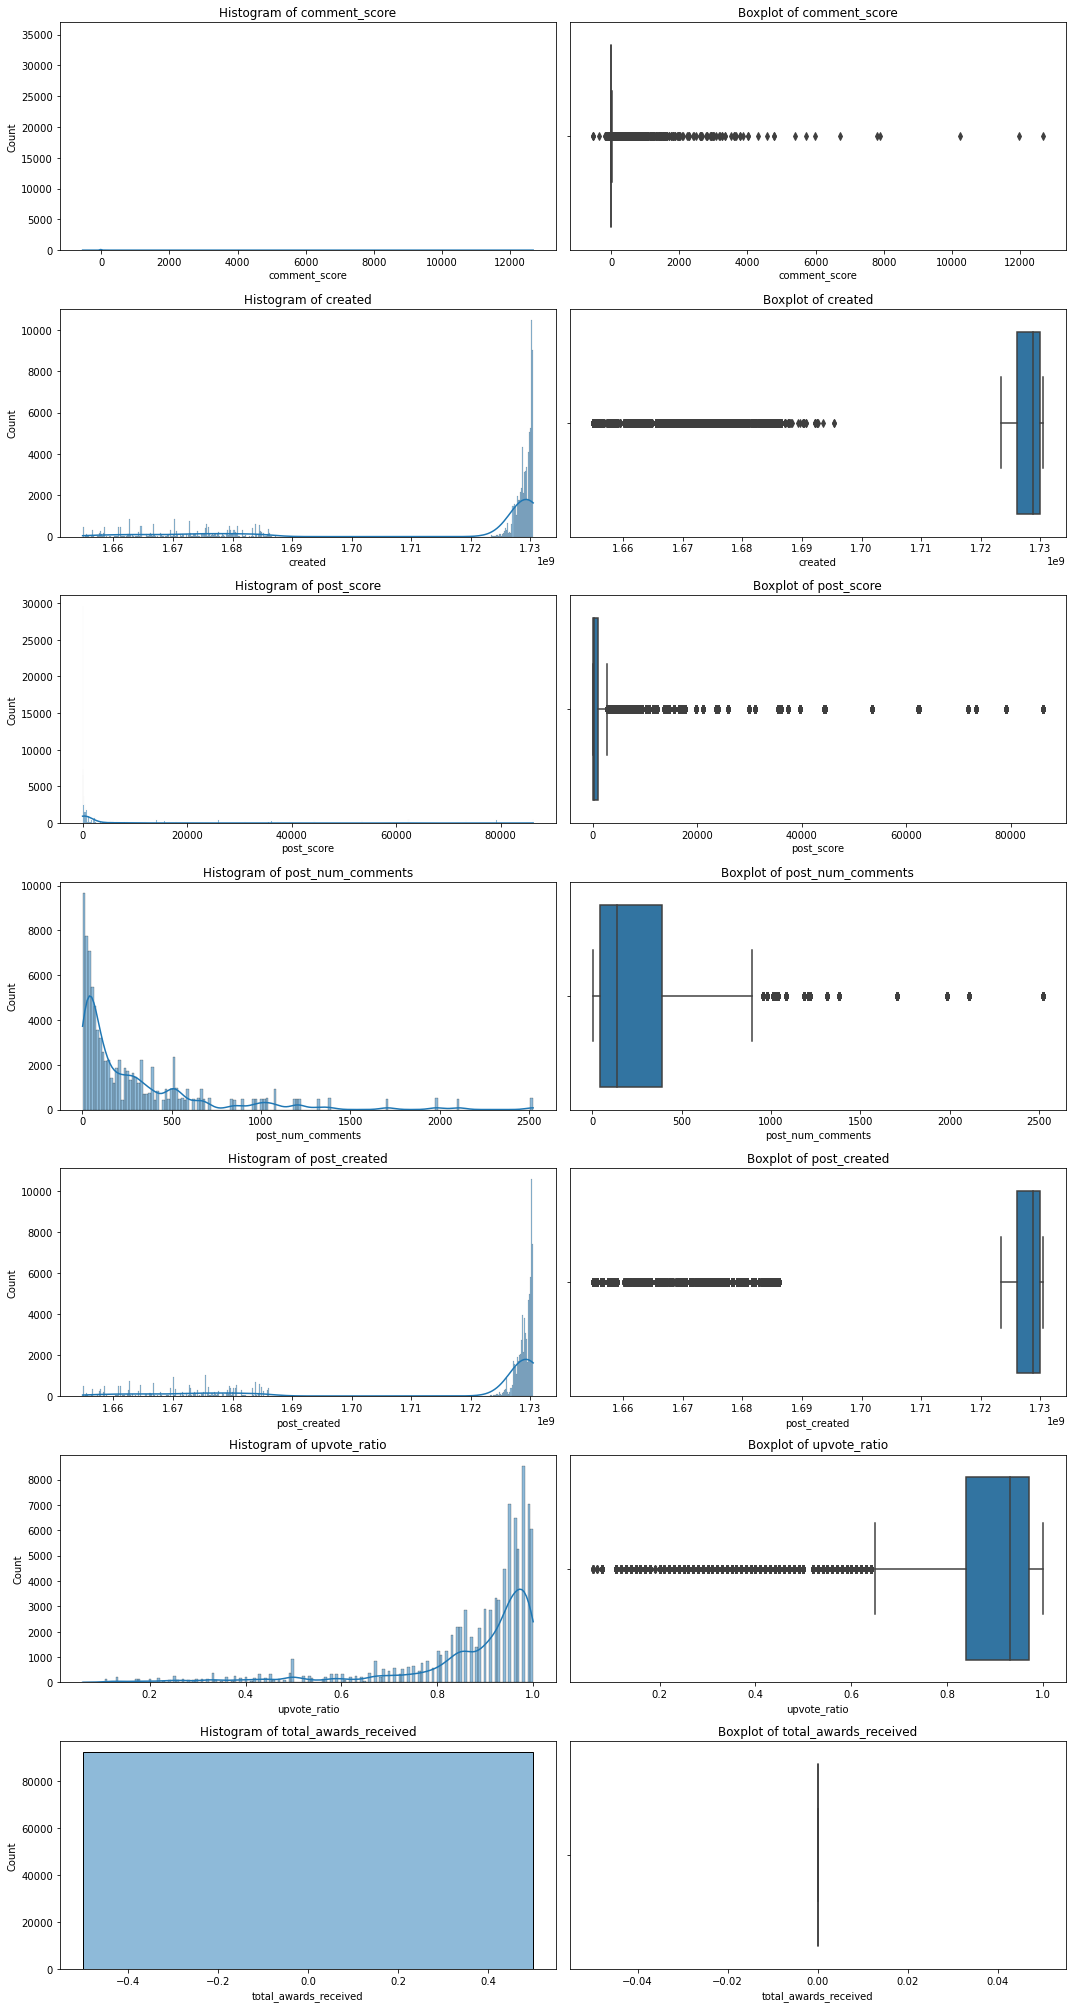

In [11]:
#Visualizing distribution of our data

# Select numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the plotting area
plt.figure(figsize=(15, len(numeric_columns) * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, 2*i - 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    plt.subplot(len(numeric_columns), 2, 2*i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

From the histograms and boxplots you provided, the data appears to be heavily skewed . Here’s a breakdown of the observations:

**Histograms:**

Most histograms show a right (positive) skew, with a concentration of values on the left and a long tail extending to the right.
This pattern suggests that there are many lower values and a few extreme higher values, which is common in social media engagement metrics like scores and upvote ratios.

**Boxplots:**

The boxplots show many outliers on the right side, which is a characteristic of positively skewed data.
The interquartile range (IQR) is narrow for several columns, but there are many data points beyond the upper whisker, indicating the presence of high-value outliers.

**IDENTIFYING OUTLIERS**

In [12]:
# Identify numeric columns in the DataFrame
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to store outliers
iqr_outliers = {}

for column in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1  # Calculate the IQR

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    iqr_outliers[column] = outliers

    # Print the number of outliers for each column
    print(f"{column}: {len(outliers)} outliers")

# Optional: Display specific outlier values for a particular column
# Uncomment and replace 'column_name' with the name of the column to inspect
# print(iqr_outliers['column_name'])


comment_score: 14907 outliers
created: 21265 outliers
post_score: 14776 outliers
post_num_comments: 7734 outliers
post_created: 21265 outliers
upvote_ratio: 9363 outliers
total_awards_received: 0 outliers


Given the nature and purpose of your analysis, removing these outliers may lead to a loss of valuable information about high-engagement or high-impact posts. We decided to retain them.

In [13]:
import numpy as np

# Function to calculate percentile rank of each value in a column
def calculate_percentile_ranks(outliers, column):
    # Calculate the percentile rank for each outlier value
    percentile_ranks = [np.percentile(data[column], (data[column] <= val).mean() * 100) for val in outliers]
    return percentile_ranks

# Initialize dictionary to store percentile ranks of outliers for each column
outlier_percentiles = {}

# List of numeric columns to check
columns_to_check = ['comment_score', 'post_score', 'upvote_ratio']

# Detect outliers and calculate their percentile ranks
for column in columns_to_check:
    # Calculate Q1 and Q3 for the IQR method
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Calculate the percentile ranks of the outliers
    percentile_ranks = calculate_percentile_ranks(outliers, column)
    
    # Store results in a dictionary
    outlier_percentiles[column] = percentile_ranks

    # Print summary
    print(f"{column}: Most outliers fall in the following percentile ranges:")
    print(pd.Series(percentile_ranks).describe())  # Summary statistics of outlier percentiles


comment_score: Most outliers fall in the following percentile ranges:
count    14907.000000
mean        74.979905
std        314.546604
min       -546.000043
25%         11.120539
50%         20.078855
75%         47.039942
max      12680.000000
dtype: float64
post_score: Most outliers fall in the following percentile ranges:
count    14776.000000
mean     28390.237149
std      25245.660308
min       2822.938994
25%       6640.572333
50%      17294.893164
75%      44307.664069
max      86196.000000
dtype: float64
upvote_ratio: Most outliers fall in the following percentile ranges:
count    9363.000000
mean        0.435517
std         0.144168
min         0.069999
25%         0.339705
50%         0.459472
75%         0.539236
max         0.648987
dtype: float64


**Analysis of Outlier Percentiles**

**comment_score:**

Mean Percentile: 74.98, suggesting that most outliers are relatively high values.
Percentiles Range: There’s a wide range with values going as low as the 5th percentile but with a mean around the 75th percentile.

**Recommendation:** Cap at the 75th percentile on the upper end. Since there are also some low outliers, consider capping the lower end at the 5th percentile.

**post_score:**

Mean Percentile: 28,390, suggesting that most outliers have very high values.
Range: Outliers vary significantly, with many extreme values, as indicated by a high std (25,245).

**Recommendation:** Cap the upper end at the 75th percentile. Given the wide range of values, capping the lower end may not be necessary if the focus is on reducing high extremes.

**upvote_ratio:**

Mean Percentile: 0.43, with values clustered around 0.34–0.54.
Range: Since this is a ratio, outliers are not as extreme as in comment_score or post_score.

**Recommendation:** Cap the upper end at the 80th percentile. This should reduce outliers without affecting the main distribution too much.

**CAPPING OUTLERS**

In [14]:
# Apply capping based on the recommended percentiles
data['comment_score'] = data['comment_score'].clip(lower=data['comment_score'].quantile(0.25),
                                                   upper=data['comment_score'].quantile(0.75))

data['post_score'] = data['post_score'].clip(upper=data['post_score'].quantile(0.75))

data['upvote_ratio'] = data['upvote_ratio'].clip(upper=data['upvote_ratio'].quantile(0.75))



In [15]:
# List of capped columns to check for remaining outliers
columns_to_check = ['comment_score', 'post_score', 'upvote_ratio']

print("Outliers detected using IQR method after capping:")

for column in columns_to_check:
    # Calculate Q1 and Q3 for the IQR method
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Print the number of remaining outliers for each column after capping
    print(f"{column}: {len(outliers)} remaining outliers after capping")


Outliers detected using IQR method after capping:
comment_score: 0 remaining outliers after capping
post_score: 0 remaining outliers after capping
upvote_ratio: 9363 remaining outliers after capping


We were able to ultimately handle all outliers for the comment_score and post_score, However, we decided to remain with outliers for upvote_ratio to maintain model stability

**3.0 EXPLORATORY DATA ANALYSIS**

**3.1 Bar Plot showing Distribution of Labels**

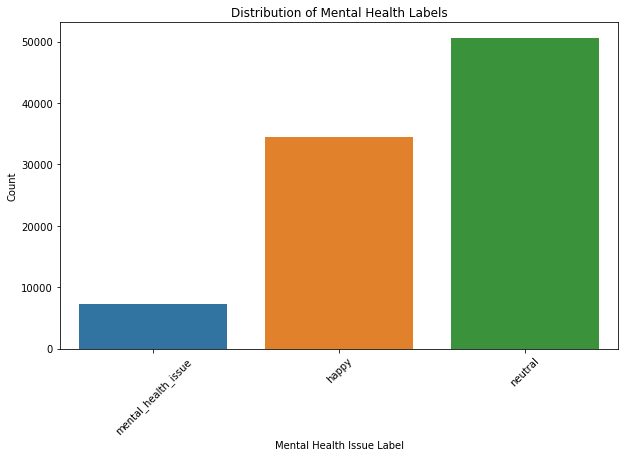

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='label')
plt.title("Distribution of Mental Health Labels")
plt.xlabel("Mental Health Issue Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Insights:**

 The chart shows three categories with varying frequencies. Neutral category (the green bar) has the highest count, followed by the happy/positive category (orange bar), and the lowest is the  mental health issue category (blue bar).


**Implications**

some categories are more prevalent in the  dataset e.g Neutral and happy . This could impact model training, as an imbalanced dataset may lead the model to perform better on the majority category and worse on the minority.

We may need to consider balancing techniques, such as oversampling the minority class or using class weights, to ensure that the model performs well across all categories.


**3.2 Histogram showing Post Length Distribution**

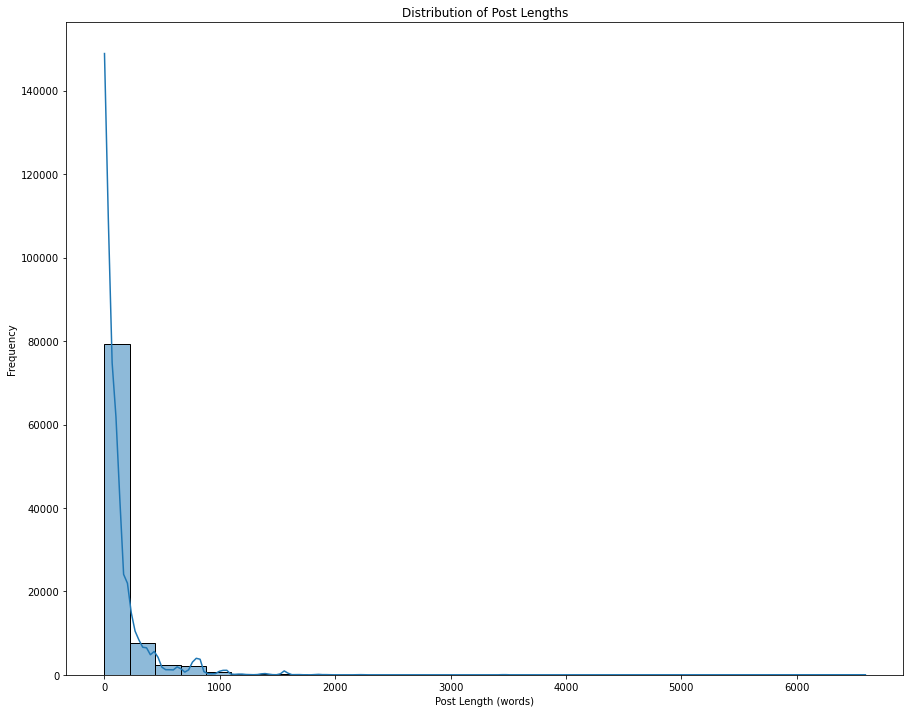

In [17]:
# Calculate the length of each post
data['post_length'] = data['post_body'].apply(lambda x: len(x.split()))

# Plot the distribution of post lengths
plt.figure(figsize=(15, 12))
sns.histplot(data['post_length'], bins=30, kde=True)
plt.title("Distribution of Post Lengths")
plt.xlabel("Post Length (words)")
plt.ylabel("Frequency")
plt.show()


**Insights**

The data is highly skewed to the right, with a large concentration of posts on the left side (lower range).
 This indicates that most posts fall within a lower range  i.e they are shorter than 1000 words , while fewer posts have higher values above 1000 words.

 However, there are some outliers that deviate from the majority  post length and may go up of up to 6,000 words.

 **Implications**

 For modeling, we may handle outliers (very long posts) separately or exclude them if they don't contribute meaningfully to our analysis.

**3.3 Histrogram Showing Distribution of Sentiment Scores**

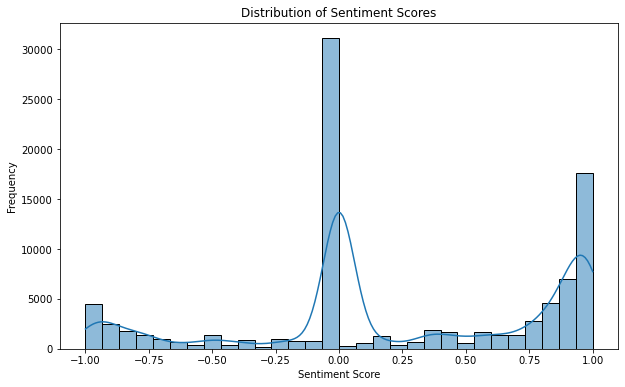

In [18]:

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each post
data['sentiment'] = data['post_body'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


**Implications**

Thie Histogram seems to show a bimodal distribution with two distinct peaks.

The two prominent peaks indicate that there are two distinct groups within the data. This could imply two different populations or behaviors within the dataset.

The first peak represents one group whose sentiment score is centered around  -0.25 (fairly negative)  while the second peak represents a differenet  group whose sentiment score is centered around 1(very postive).

Both ends of the histogram show smaller bars, which could represent outliers or infrequent behaviors not fitting into the main clusters.

**Implications**

Given the clear separation between the two peaks, it may be beneficial to treat the two groups separately in our analysis.

This segmentation could allow for more targeted insights or better model performance, especially if the behaviors or language used in each group differ.


Modeling Considerations:

A single model may not capture the nuances across both clusters effectively. We may need to consider building separate models or using clustering techniques to handle each group independently.

**DISTRIBUTION PLOTS  FOR NUMERICAL FEATURES**

In [19]:
data.columns

Index(['title', 'post_body', 'comment_body', 'comment_score', 'created',
       'subreddit', 'label', 'post_score', 'post_num_comments', 'post_created',
       'post_flair', 'upvote_ratio', 'over_18', 'total_awards_received',
       'link_flair_text', 'post_length', 'sentiment'],
      dtype='object')

c:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


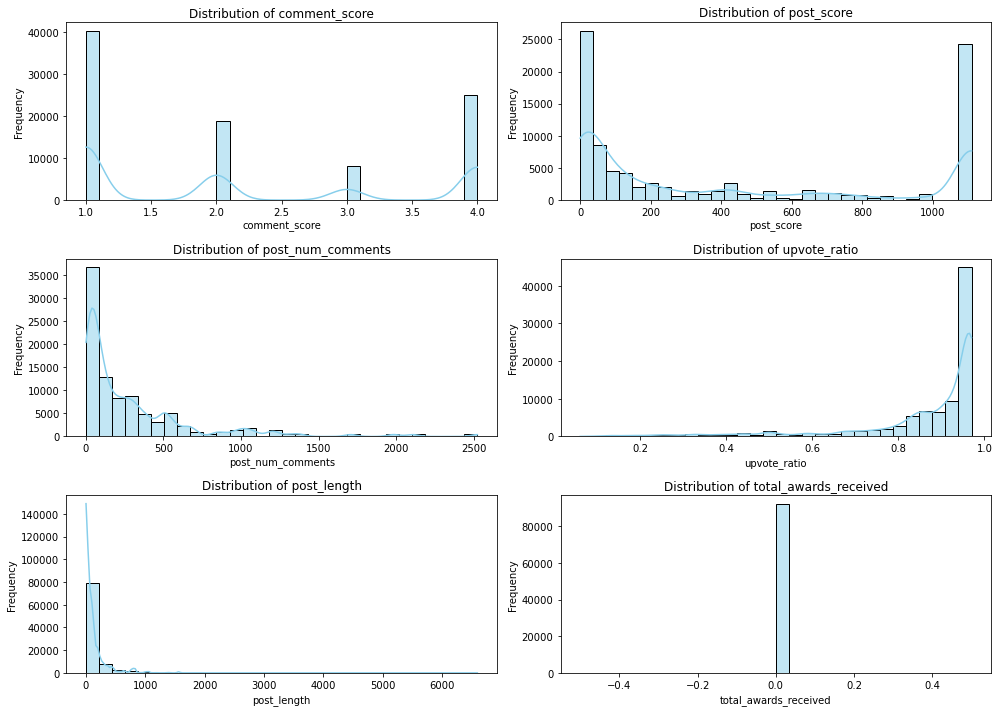

In [20]:
# Define numerical columns to visualize
numerical_features = [
    'comment_score', 'post_score', 'post_num_comments', 
    'upvote_ratio', 'post_length','total_awards_received'
]

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot distributions for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)  # Adjusted for 6 features (3 rows, 2 columns)
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**WORD CLOUD PER LABEL**

We visualized most common words for happy, neutral and mental_health_issue posts and comments

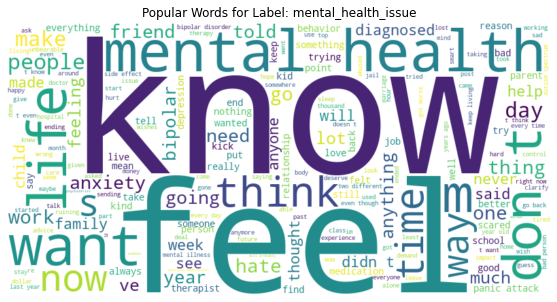

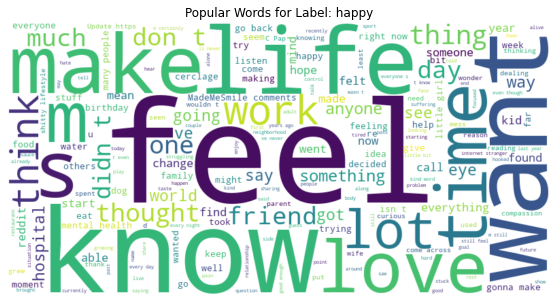

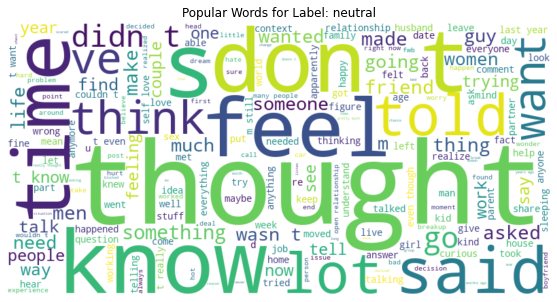

In [21]:

# Function to generate and display a word cloud for each label
def generate_word_clouds_per_label(data, text_column, label_column):
    # Get unique labels
    labels = data[label_column].unique()
    
    # Create a word cloud for each label
    for label in labels:
        # Filter text data for the current label
        text_data = " ".join(data[data[label_column] == label][text_column].astype(str))
        
        # Generate the word cloud without specifying a font path
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
        
        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.title(f"Popular Words for Label: {label}")
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

# Example usage
# Replace 'post_body' with your text column name and 'label' with your label column name
generate_word_clouds_per_label(data, text_column='post_body', label_column='label')

**Popular Words Per Label**

**Mental Health Issue**

"know, feel, want, life, mental, health"

**Happy**

"know, love, make, feel, want, work"

**Neutral**

"thought, feel, know, said, want, time"

The words like "know," "feel," and "want" are common across labels, indicating that discussions may revolve around introspection, personal desires, and emotions.

**FEATURE ENGINEERING**

We decided to Create a Feature named  High Engagement which shows high-engagement posts based on post_score and visualize with a count plot. . High engagement posts might indicate popular or impactful discussions.

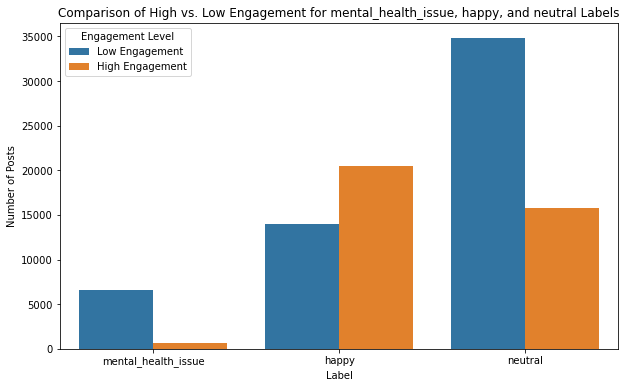

In [22]:

# Step 1: Define high engagement based on the 90th percentile of post_score
high_engagement_threshold = data['post_score'].quantile(0.60)
data['high_engagement'] = data['post_score'] > high_engagement_threshold

# Step 2: Filter data for the specific labels: mental_health_issue, happy, and neutral
filtered_data = data[data['label'].isin(['mental_health_issue', 'happy', 'neutral'])]

# Step 3: Plot high vs low engagement for each label
plt.figure(figsize=(10, 6))
sns.countplot(x='label', hue='high_engagement', data=filtered_data)
plt.title('Comparison of High vs. Low Engagement for mental_health_issue, happy, and neutral Labels')
plt.xlabel('Label')
plt.ylabel('Number of Posts')
plt.legend(title='Engagement Level', labels=['Low Engagement', 'High Engagement'])
plt.show()


**Insights**

**Engagement Distribution:**

1.Neutral content has the highest number of low-engagement posts (blue), indicating that neutral topics generally receive less interaction from the audience.

2.Mental health-related content shows low numbers of  hign engagement posts indicating that people with mental health issues most likely don't want to talk about it on social platform hence the high number posts with  low engagement .

3.The Happy label has both  moderate number of both high and low engagement posts, indicating a balanced engagement level for positive content.

In [23]:
#viewing columns
data.columns

Index(['title', 'post_body', 'comment_body', 'comment_score', 'created',
       'subreddit', 'label', 'post_score', 'post_num_comments', 'post_created',
       'post_flair', 'upvote_ratio', 'over_18', 'total_awards_received',
       'link_flair_text', 'post_length', 'sentiment', 'high_engagement'],
      dtype='object')

**CO-ORELATION MATRIX FOR NUMERICAL FEATURES**

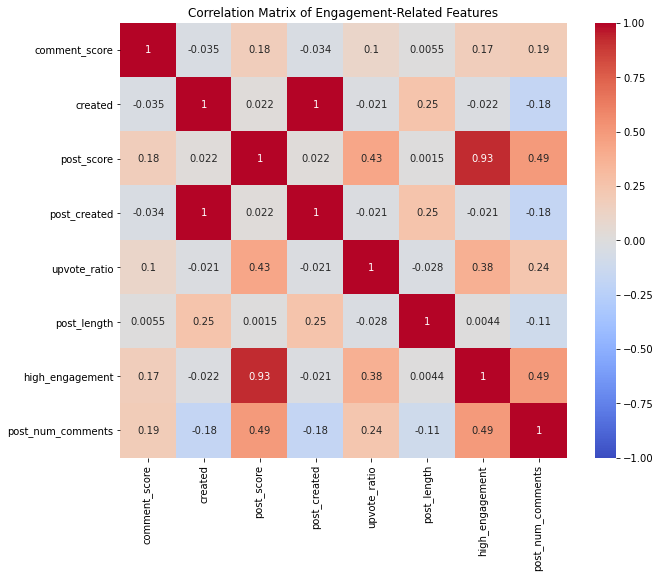

In [24]:

# Select only numerical columns for the correlation matrix
numerical_columns = [
    'comment_score', 'created', 'post_score', 'post_created',
    'upvote_ratio', 'post_length', 'high_engagement','post_num_comments'
]

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Engagement-Related Features')
plt.show()


Due to the strong correlation between post_score and high engagement, we'll consider removing one of these columns to reduce multicollinearity.

Well keep oneof them   based on the importance to your analysis. 


**4.0 DATA PREPROCESSING**

To prepare the text data for modeling, WEtake the following steps:

Converts text to lowercase.

Removes mentions (e.g., @username).

Removes non-alphabetic characters and symbols.

Splits text into words (tokenization).

Removes stop words.

Applies stemming to reduce words to their root form.

In [42]:
import nltk
nltk.download('stopwords', download_dir='C:/Users/PC/AppData/Roaming/nltk_data')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/PC/AppData/Roaming/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])  # Should print a sample of English stopwords


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [44]:
import nltk
nltk.download('punkt')  # This will skip downloading if punkt is already installed
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove non-alphabetic characters and symbols
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    # Join words back into a single string
    processed_text = ' '.join(words)
    
    return processed_text

# Applying the function to both 'post_body' and 'comment_body' columns in DataFrame
# Ensure 'data' DataFrame is loaded and columns are named 'post_body' and 'comment_body'
data['cleaned_post_body'] = data['post_body'].apply(lambda x: preprocess_text(str(x)))
data['cleaned_comment_body'] = data['comment_body'].apply(lambda x: preprocess_text(str(x)))

# Display a sample of the processed data
print(data[['post_body', 'cleaned_post_body', 'comment_body', 'cleaned_comment_body']].head())


                                           post_body  \
0  I'm finding it really hard to keep myself toge...   
1  Please tell me if I sound entitled or selfish....   
2  Does anyone else ever get like this? Or have a...   
3  Does anyone else ever get like this? Or have a...   
4  I feel in over my head and I’m not sure what t...   

                                   cleaned_post_body  \
0  im find realli hard keep togeth everi littl in...   
1  pleas tell sound entitl selfish went worst cri...   
2  anyon els ever get like advic work past year i...   
3  anyon els ever get like advic work past year i...   
4  feel head im sure need object perspect first s...   

                                        comment_body  \
0  Have you got a therapist on board? Sounds like...   
1  I think it’s a combination of factors, and I s...   
2  When I have a panic attack, I tend to think th...   
3  Im wondering if it was simply a panic attack. ...   
4  Please consider seeing a psychologist. Good

In [26]:
#view first 5 rows
data.head()


,title,post_body,comment_body,comment_score,created,subreddit,label,post_score,post_num_comments,post_created,post_flair,upvote_ratio,over_18,total_awards_received,link_flair_text,post_length,sentiment,high_engagement,cleaned_post_body,cleaned_comment_body
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,2,1.730484e+09,mentalhealth,mental_health_issue,1,1,1.730482e+09,Venting,0.97,False,0,Venting,156,-0.9891,False,im find realli hard keep togeth everi littl in...,got therapist board sound like much hold think...
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",2,1.730480e+09,mentalhealth,mental_health_issue,1,1,1.730479e+09,Venting,0.97,False,0,Venting,125,-0.4647,False,pleas tell sound entitl selfish went worst cri...,think combin factor say someon recent cut tie ...
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",1,1.730486e+09,mentalhealth,mental_health_issue,2,2,1.730478e+09,Venting,0.97,False,0,Venting,360,-0.9656,False,anyon els ever get like advic work past year i...,panic attack tend think way bad thing true
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,2,1.730487e+09,mentalhealth,mental_health_issue,2,2,1.730478e+09,Venting,0.97,False,0,Venting,360,-0.9656,False,anyon els ever get like advic work past year i...,im wonder simpli panic attack havent type pani...
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,1,1.730477e+09,mentalhealth,mental_health_issue,1,4,1.730477e+09,Need Support,0.97,False,0,Need Support,422,0.7680,False,feel head im sure need object perspect first s...,pleas consid see psychologist good luck


**LABEL ENCODING**

In [27]:
data.columns

Index(['title', 'post_body', 'comment_body', 'comment_score', 'created',
       'subreddit', 'label', 'post_score', 'post_num_comments', 'post_created',
       'post_flair', 'upvote_ratio', 'over_18', 'total_awards_received',
       'link_flair_text', 'post_length', 'sentiment', 'high_engagement',
       'cleaned_post_body', 'cleaned_comment_body'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
columns_to_encode = ['subreddit', 'post_flair', 'link_flair_text', 'over_18', 'sentiment','label']

# Dictionary to store mappings of labels and their assigned numbers
label_mappings = {}

for column in columns_to_encode:
    # Initialize the label encoder
    le = LabelEncoder()
    
    # Fit and transform the column
    data[column] = le.fit_transform(data[column])
    
    # Store the label mappings in a dictionary
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the label mappings for each encoded column
for column, mapping in label_mappings.items():
    print(f"Label encoding for '{column}': {mapping}")


Label encoding for 'subreddit': {'Anxiety': 0, 'AskMen': 1, 'AskReddit': 2, 'AskWomen': 3, 'BipolarReddit': 4, 'CasualConversation': 5, 'Depression': 6, 'GetMotivated': 7, 'MadeMeSmile': 8, 'OffMyChest': 9, 'SuicideWatch': 10, 'TrueOffMyChest': 11, 'happy': 12, 'mentalhealth': 13}
Label encoding for 'post_flair': {' :cakeday: :downvote:Very Reddit:upvote: :cakeday:': 0, ' :snoo_shrug:Small Success:snoo_wink: ': 1, ':birb2: Animals': 2, ':cat2: kitten': 3, ':cat3: CATS :cat1:': 4, ':catwithmask50px2:Covid-19:catwithmask50px2mirror:': 5, ':chat: Just Chatting': 6, ':dog1: DOGS :dog1:': 7, ':doge: doggo :doge:': 8, ':film: Movies & Shows': 9, ':food: Food & Drinks': 10, ':gaming: Gaming': 11, ':ididit: Made did it': 12, ':jokerdance: Personal Win :jokerdancemirror:': 13, ':mark: Books & Reading': 14, ':note: Music': 15, ':orly:ANIMALS :sloth:': 16, ':party: Celebration': 17, ':paw: Pets & Animals': 18, ':puppywave: Doggo': 19, ':question: Questions': 20, ':smilingface2: Family & Friends :

**5.0 FEATURE SELECTION**

 **Recommended Features for Model Building**
With regard to our  goal we  chose to focus on the following features:

**Title:**
 The title often summarizes the main point of the post and can provide insights into the topic or emotional tone.

**created:**
Allows analysis of trends over time, such as peak times for mental health discussions or changes in engagement.

**post_body and comment_body:** Primary text sources, critical for NLP and sentiment analysis.

**subreddit:** Adds context, as different subreddits have unique norms and topics.

**post_score and comment_score:** Proxy measures for engagement, indicating popularity and community response.

**upvote_ratio:** Reflects community agreement, useful for predicting engagement or sentiment alignment.

**post_length:** Simple numeric feature that could correlate with in-depth discussion or seriousness.

**label:** Could provide additional context if it’s an internal classification feature rather than the target.

**post_num_comments**
Reflects engagement level, providing an additional measure of popularity or user interest.

We drop columns post_body, and comment_body assince we have cleaned post body and cleaned comment body

We also drop  column post created as they show similar data with created

This selection balances textual content, engagement indicators, and contextual features, which could yield meaningful insights for sentiment analysis or mental health prediction tasks

**MODELLING**

**1.LOGISITC REGRESSION MODEL**

In [33]:
data.columns

Index(['title', 'comment_score', 'subreddit', 'label', 'post_score',
       'post_num_comments', 'post_flair', 'upvote_ratio', 'over_18',
       'total_awards_received', 'link_flair_text', 'post_length', 'sentiment',
       'high_engagement', 'cleaned_post_body', 'cleaned_comment_body'],
      dtype='object')

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define the remaining features and target
features = [
    'title', 'subreddit', 'post_score', 'comment_score', 'upvote_ratio', 
    'over_18', 'total_awards_received', 'link_flair_text', 'post_length', 
    'sentiment', 'high_engagement', 'cleaned_post_body', 'cleaned_comment_body'
]
target = 'label'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Define column transformer to handle different types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot_title', OneHotEncoder(handle_unknown='ignore'), ['title']),  # One-hot encoding for title as list
        ('tfidf_cleaned_post', TfidfVectorizer(max_features=1000), 'cleaned_post_body'),  # TF-IDF for cleaned_post_body
        ('tfidf_cleaned_comment', TfidfVectorizer(max_features=1000), 'cleaned_comment_body'),  # TF-IDF for cleaned_comment_body
        ('numeric', StandardScaler(), [
            'post_score', 'comment_score', 'upvote_ratio', 'total_awards_received', 
            'post_length', 'high_engagement'
        ]),  # Standard scaling for numeric features
    ], remainder='passthrough'  # Pass through already encoded categorical features
)

# Create pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter if convergence issues occur
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9205498728148509
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      6927
           1       0.84      0.74      0.79      1441
           2       0.92      0.96      0.94     10109

    accuracy                           0.92     18477
   macro avg       0.90      0.87      0.88     18477
weighted avg       0.92      0.92      0.92     18477




The logistic regression model achieved an overall accuracy of 92%, which is generally good

The model performs well overall but could improve on detecting "Mental Health Issues" (Class 1) due to its slightly lower recall.

Class Imbalance: The data has an imbalance, with more instances in "Neutral" and "Happy" classes than in "Mental Health Issues." This imbalance may be influencing the lower recall for Class 1.

**BERT MODEL**